In [68]:
import pandas as pd
import sqlite3
import os

csv_path = "../../male_players.csv"

columns = ['short_name', 'long_name', 'player_id',
       'fifa_version', 'fifa_update',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name',
       'league_level', 'club_team_id', 'club_name', 'club_position',
       'club_jersey_number', 'club_contract_valid_until_year',
       'nationality_name', 'nation_jersey_number', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
       'body_type', 'release_clause_eur', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing']

chunk_size = 100000

# for i,chunk in enumerate(pd.read_csv(csv_path, chunksize=100_000, usecols=columns)):
#     filtered = chunk[(chunk['league_id'] == 14) & (chunk['fifa_update'] == 2)]

#     if not filtered.empty:
#         write_header = not os.path.exists("championship_players.csv")
#         filtered.to_csv("championship_players.csv", mode='a', header=write_header, index=False)
    

df = pd.read_csv("championship_players.csv")

In [69]:
df['fifa_version']

0        23
1        23
2        23
3        23
4        23
         ..
12791    15
12792    15
12793    15
12794    15
12795    15
Name: fifa_version, Length: 12796, dtype: int64

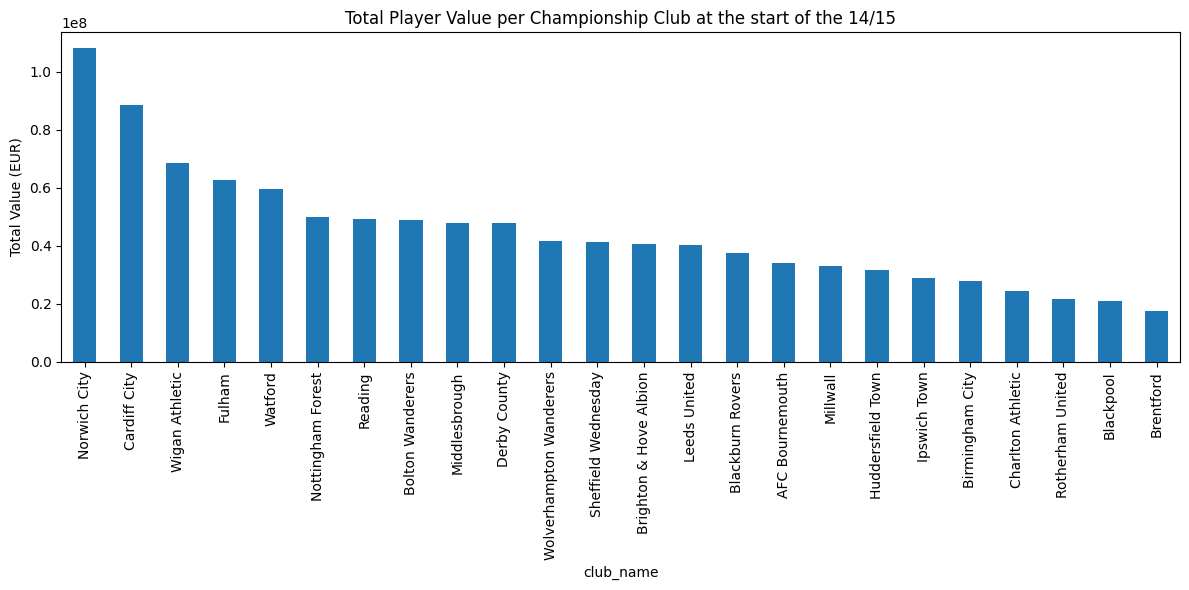

In [70]:
# df_15 = df[df['fifa_version'] = 15]
# df_16 = df[df['fifa_version'] = 16]
# df_17 = df[df['fifa_version'] = 17]
# df_18 = df[df['fifa_version'] = 18]
# df_19 = df[df['fifa_version'] = 19]
# df_20 = df[df['fifa_version'] = 20]
# df_21 = df[df['fifa_version'] = 21]
# df_22 = df[df['fifa_version'] = 22]
# df_23 = df[df['fifa_version'] = 23]
import matplotlib.pyplot as plt
%matplotlib inline

# Filter for FIFA 15
df_fifa15 = df[df['fifa_version'] == 15]

# Group by club and sum the 'value_eur'
club_values = df_fifa15.groupby('club_name')['value_eur'].sum().sort_values(ascending=False)

# Plot
club_values.plot(kind='bar', figsize=(12, 6), title='Total Player Value per Championship Club at the start of the 14/15')
plt.ylabel("Total Value (EUR)")
plt.tight_layout()
plt.show()


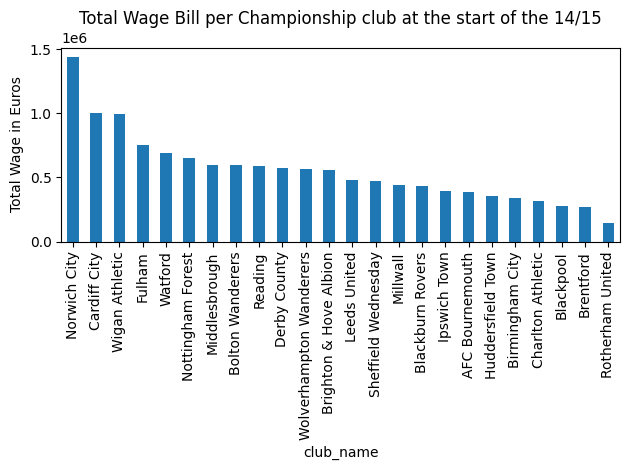

In [71]:
wage_bill = df_fifa15.groupby('club_name')['wage_eur'].sum().sort_values(ascending=False)
wage_bill.plot(kind='bar', title='Total Wage Bill per Championship club at the start of the 14/15')
plt.ylabel('Total Wage in Euros')
plt.tight_layout()
plt.show()

In [72]:
champ15_ids = df_fifa15['club_team_id'].dropna().unique()
len(champ15_ids)

24

In [73]:
# for i,chunk in enumerate(pd.read_csv(csv_path, chunksize=100_000, usecols=columns)):
#     filtered = chunk[(chunk['club_team_id'].isin(champ15_ids)) & (chunk['fifa_update'] == 2)]

#     if not filtered.empty:
#         write_header = not os.path.exists("championship15_players.csv")
#         filtered.to_csv("championship15_players.csv", mode='a', header=write_header, index=False)
    

In [74]:
df_champ15_teams = pd.read_csv("championship15_players.csv")

In [75]:
df_champ15_teams

,player_id,fifa_version,fifa_update,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,...,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing
0,224293,23,2,Rúben Neves,Rúben Diogo da Silva Neves,"CM, CDM",83,86,47500000.0,105000.0,...,Normal (170-185),93800000.0,58.0,74.0,86.0,77.0,76.0,73.0,80,65
1,204838,23,2,R. Jiménez,Raúl Alonso Jiménez Rodríguez,ST,82,82,25500000.0,110000.0,...,Normal (185+),48500000.0,73.0,81.0,76.0,80.0,47.0,82.0,73,81
2,224411,23,2,Gonçalo Guedes,Gonçalo Manuel Ganchinho Guedes,"ST, LM, CF",82,85,41000000.0,105000.0,...,Normal (170-185),81000000.0,86.0,83.0,74.0,83.0,38.0,70.0,81,82
3,162347,23,2,João Moutinho,João Filipe Iria Santos Moutinho,CM,81,81,10500000.0,70000.0,...,Normal (170-),20000000.0,47.0,71.0,84.0,79.0,71.0,66.0,82,68
4,194404,23,2,Neto,Norberto Murara Neto,GK,81,81,13000000.0,47000.0,...,Lean (185+),26000000.0,NaN,NaN,NaN,NaN,NaN,NaN,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,220614,15,2,Albert Torras,Albert Torras Crespo,"CAM, CM",50,61,30000.0,2000.0,...,Lean (170-185),NaN,55.0,40.0,54.0,50.0,37.0,51.0,43,40
6390,204888,15,2,H. Osborne,Harry Osborne,CB,49,60,20000.0,2000.0,...,Lean (170-185),NaN,66.0,30.0,27.0,40.0,49.0,59.0,25,25
6391,219785,15,2,T. Holmes-Dennis,Tareiq Holmes-Dennis,LB,49,55,20000.0,2000.0,...,Normal (170-185),NaN,64.0,30.0,34.0,50.0,49.0,57.0,50,30
6392,220058,15,2,D. Phillips,Dillon Phillips,GK,49,58,20000.0,2000.0,...,Lean (185+),NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,25


In [76]:
#This sums the value of the players across every fifa to see how they progressed other this time period
tot_val_of_champ_players_from_15_clubs = df_champ15_teams.groupby('club_name')['value_eur'].sum().sort_values(ascending=False)

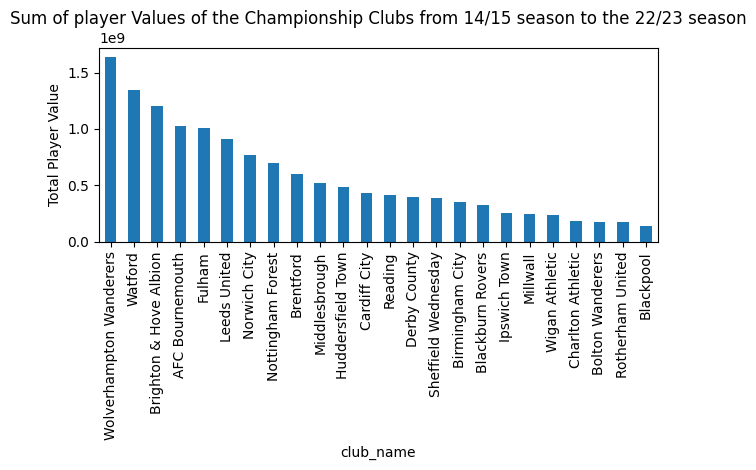

In [77]:
tot_val_of_champ_players_from_15_clubs.plot(kind='bar', title='Sum of player Values of the Championship Clubs from 14/15 season to the 22/23 season')
plt.ylabel('Total Player Value')
plt.tight_layout()
plt.show()

In [78]:
df[(df['club_name'] == 'Blackpool') & (df['fifa_version']==22)]['league_name'].unique()


array(['Championship'], dtype=object)

In [79]:
# def timeline_value(team_id, start_szn, end_szn)->():
#     team_name = df_champ15_teams[df_champ15_teams['club_team_id'] == team_id]['club_name'].unique()
#     our_team = df_champ15_teams[df_champ15_teams['club_team_id'] == team_id]
#     grouped_value = our_team.groupby('fifa_version').sum()
#     grouped_value['value_eur'].plot(kind='line', title=f'Total Player Value of {team_name[0]}')
#     plt.ylabel('Total Value in Euros')
#     plt.xlabel('Season')
#     plt.tight_layout()
#     plt.show()
#     return

def timeline_value(team_id, start_szn, end_szn):
    team_name = df_champ15_teams[df_champ15_teams['club_team_id'] == team_id]['club_name'].unique()
    our_team = df_champ15_teams[df_champ15_teams['club_team_id'] == team_id]
    
    # Sum values by fifa_version
    grouped_value = our_team.groupby('fifa_version')['value_eur'].sum().reset_index()
    
    # Convert to millions
    grouped_value['value_eur_million'] = grouped_value['value_eur'] / 1_000_000

    # Plot
    grouped_value.plot(x='fifa_version', y='value_eur_million', kind='line', title=f'Total Player Value of {team_name[0]}')
    plt.ylabel('Total Value (Millions of Euros)')
    plt.xlabel('FIFA Season')
    plt.tight_layout()
    plt.show()
    return


In [80]:
champ15_ids[0]

144.0

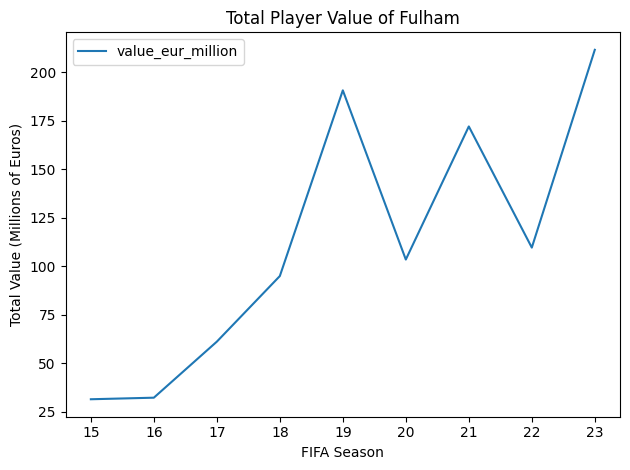

In [81]:
timeline_value(champ15_ids[0], 15, 23)

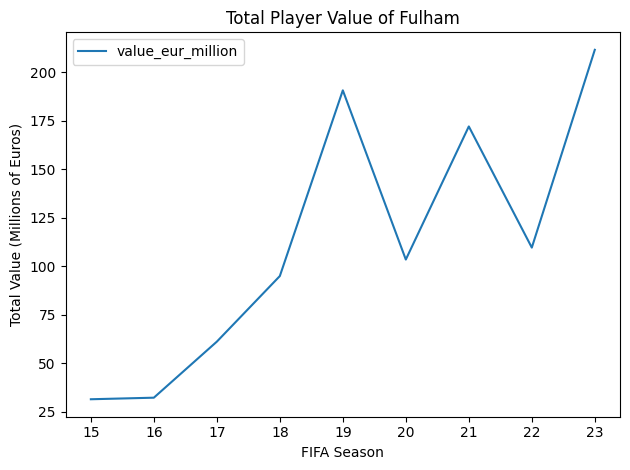

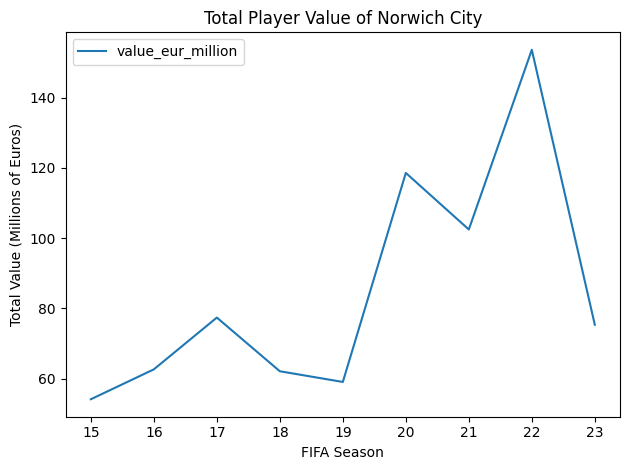

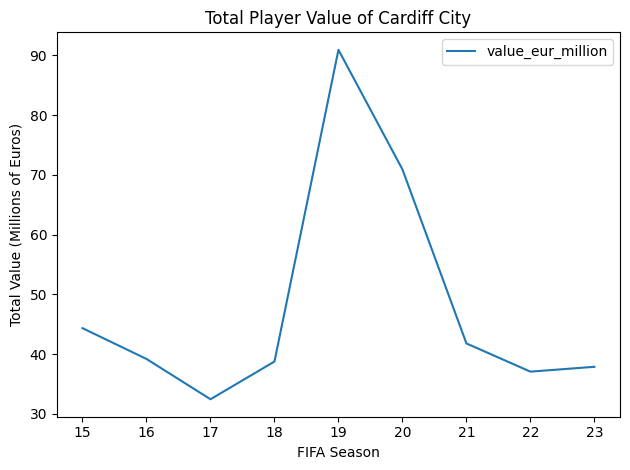

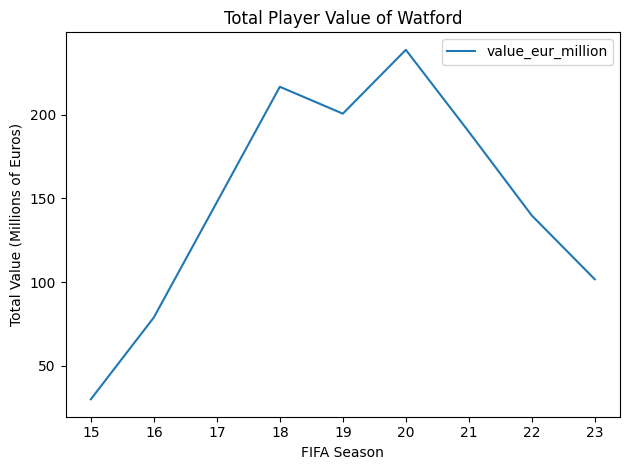

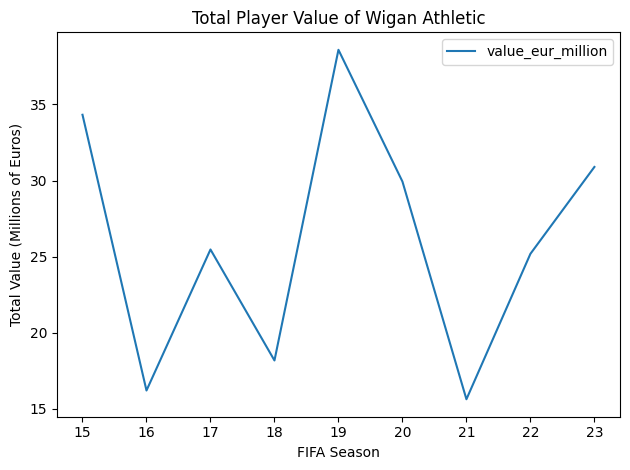

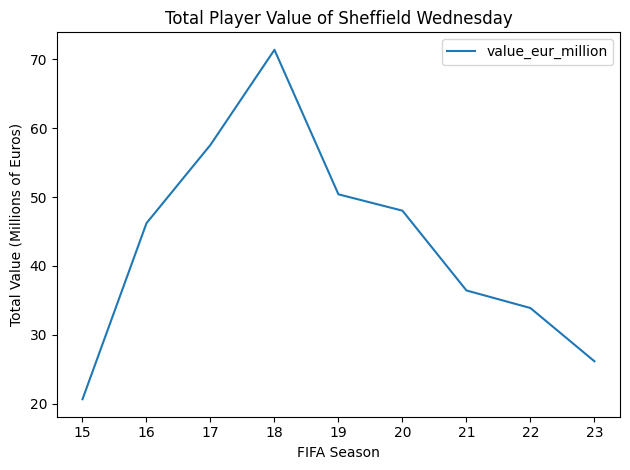

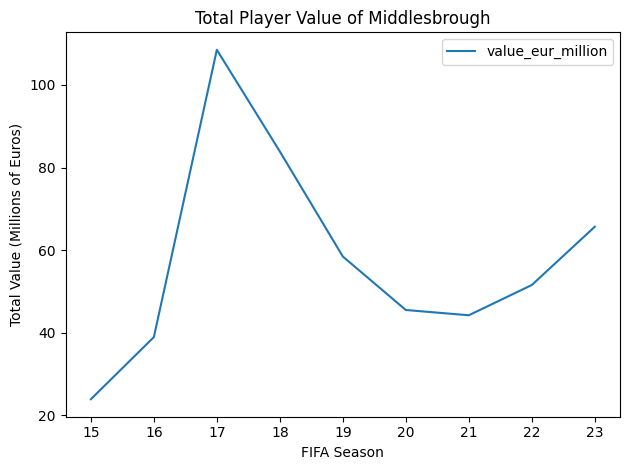

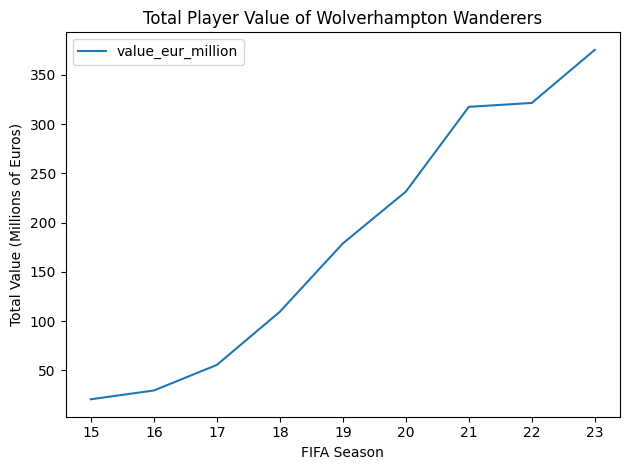

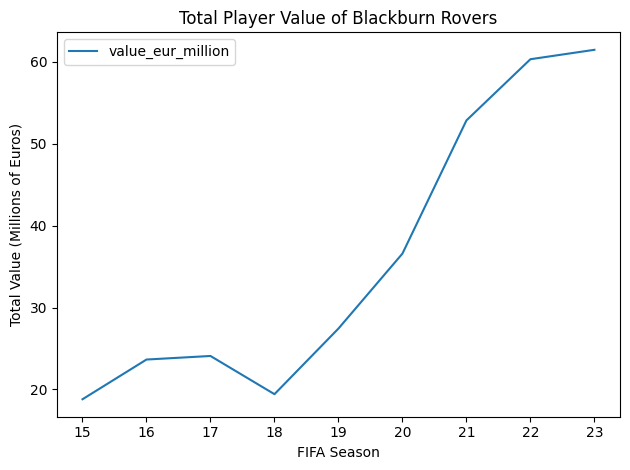

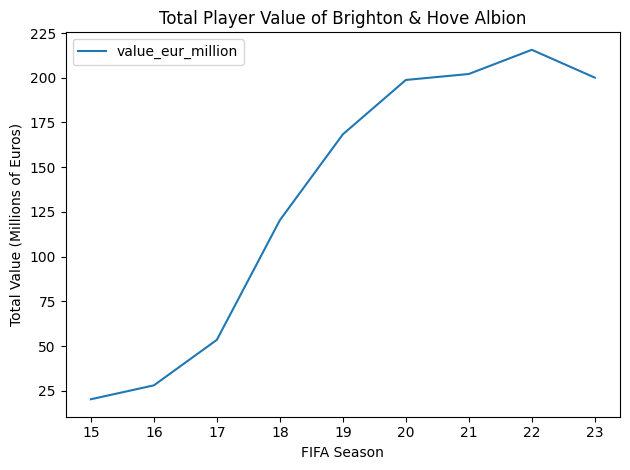

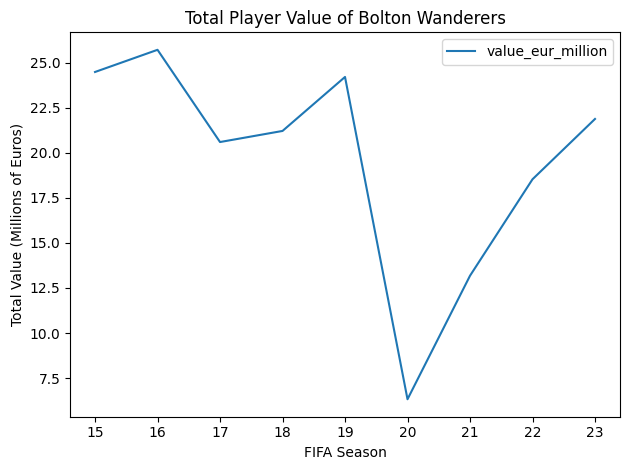

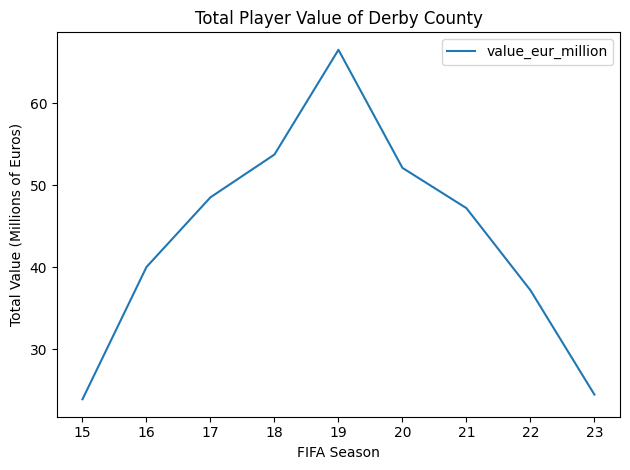

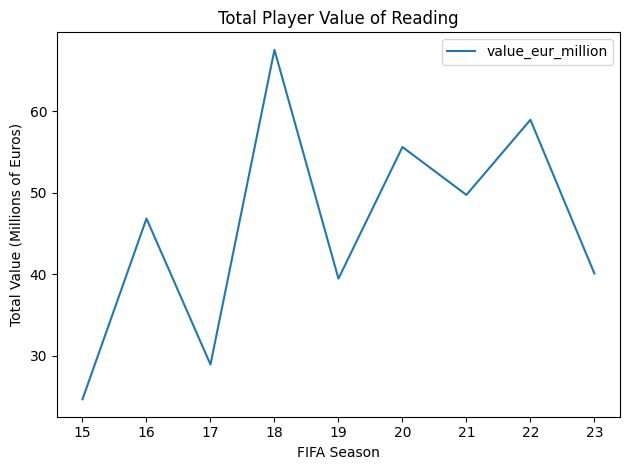

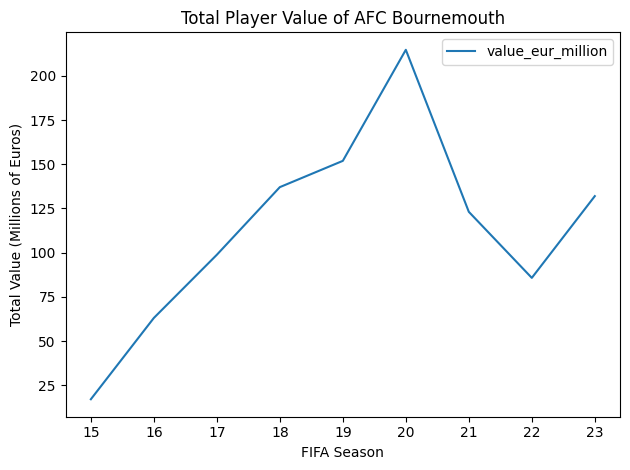

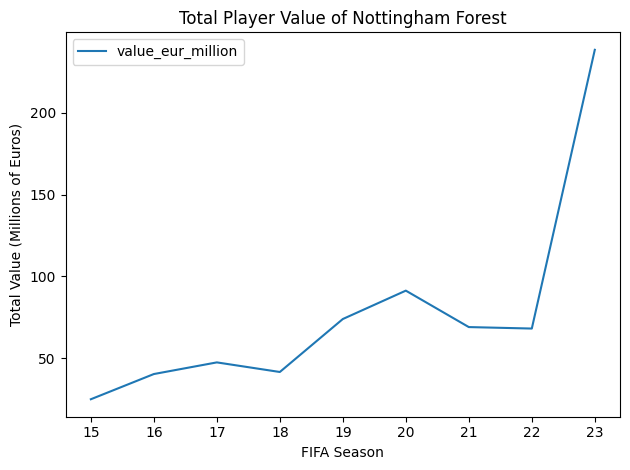

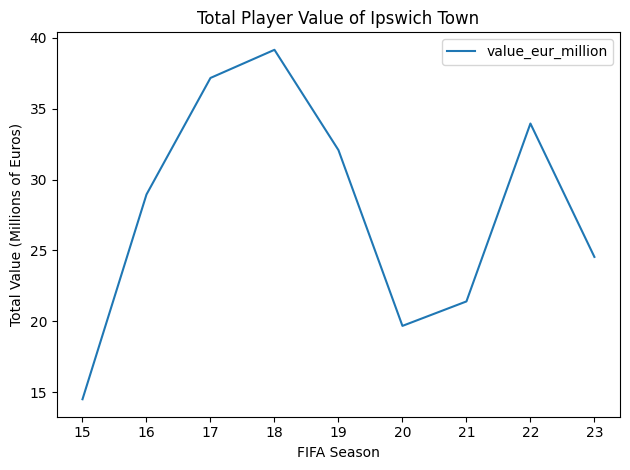

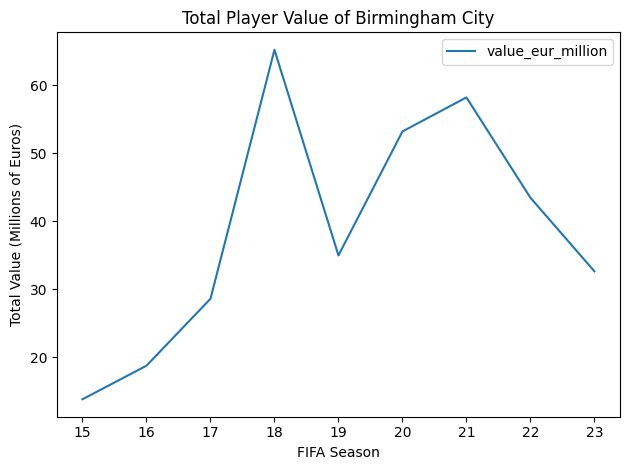

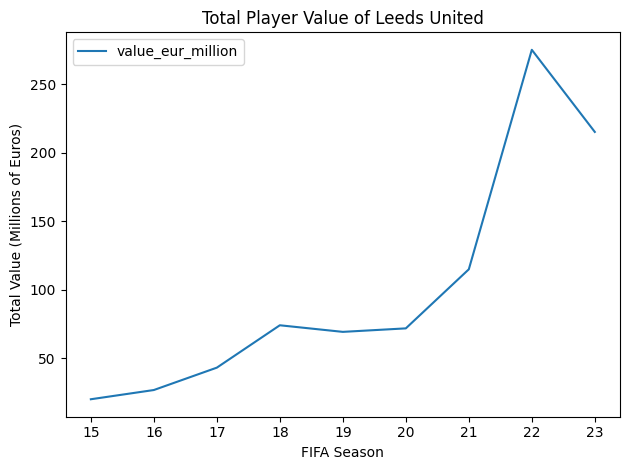

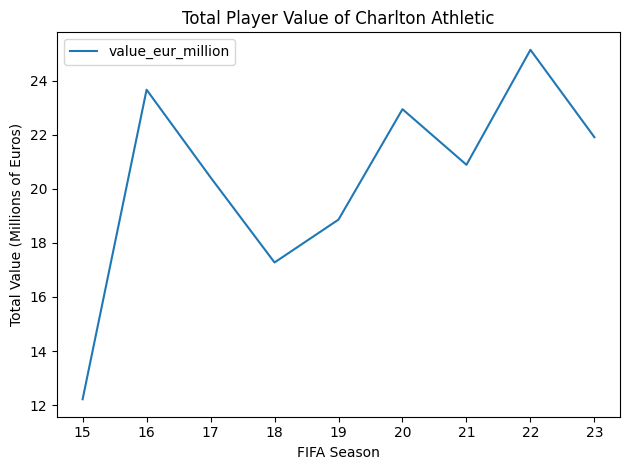

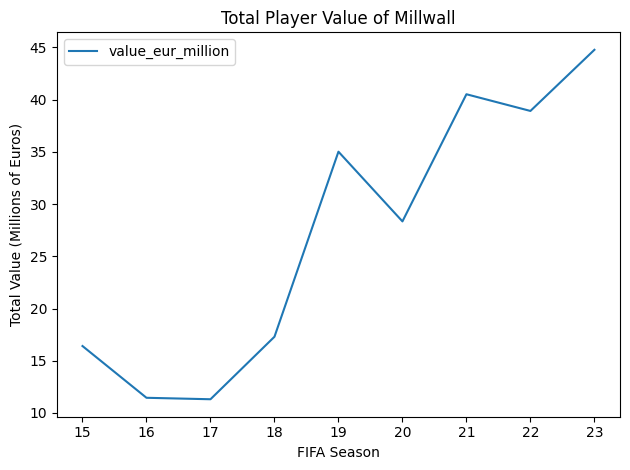

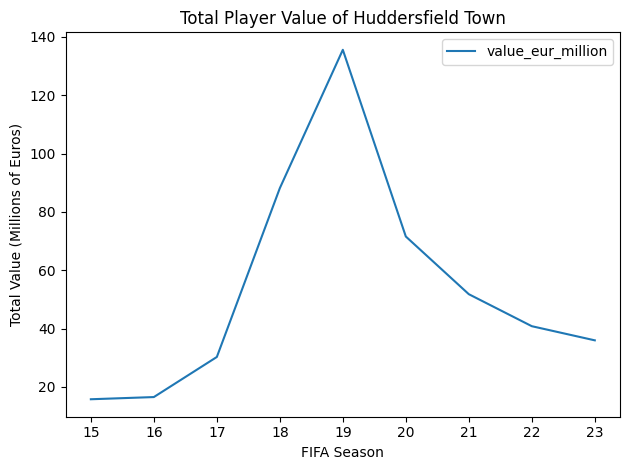

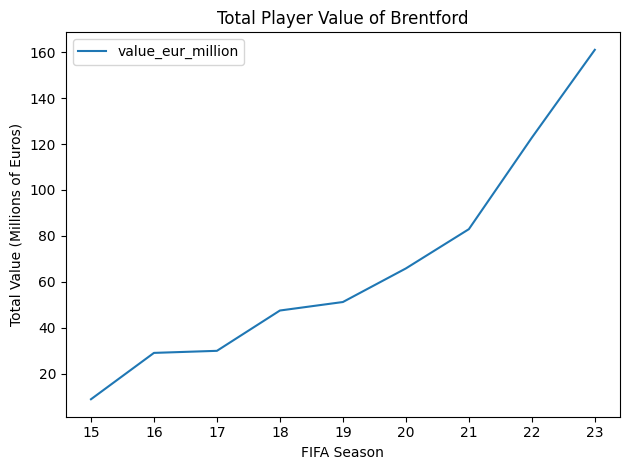

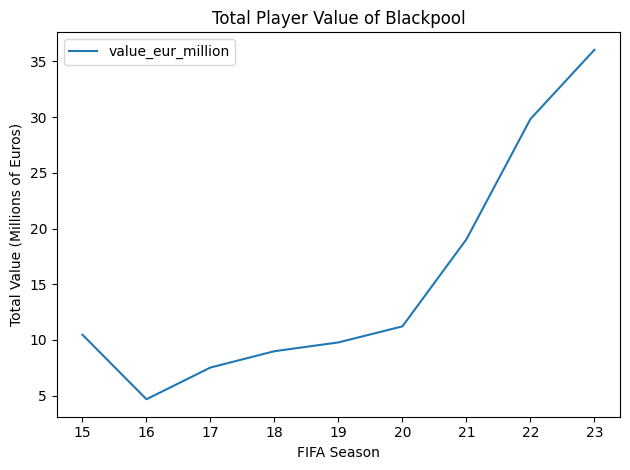

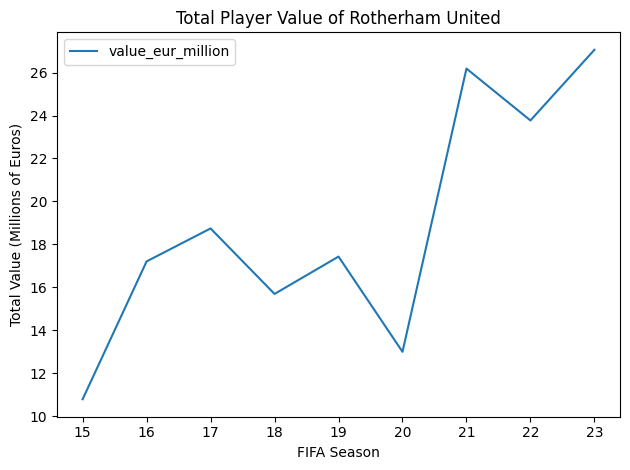

In [82]:
for id in champ15_ids:
    timeline_value(id, 15, 23)